<a href="https://colab.research.google.com/github/duspic/RubiksCubeNumpy/blob/main/Rubik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Make a Rubik's cube representation in tensors

In [2]:
import numpy as np

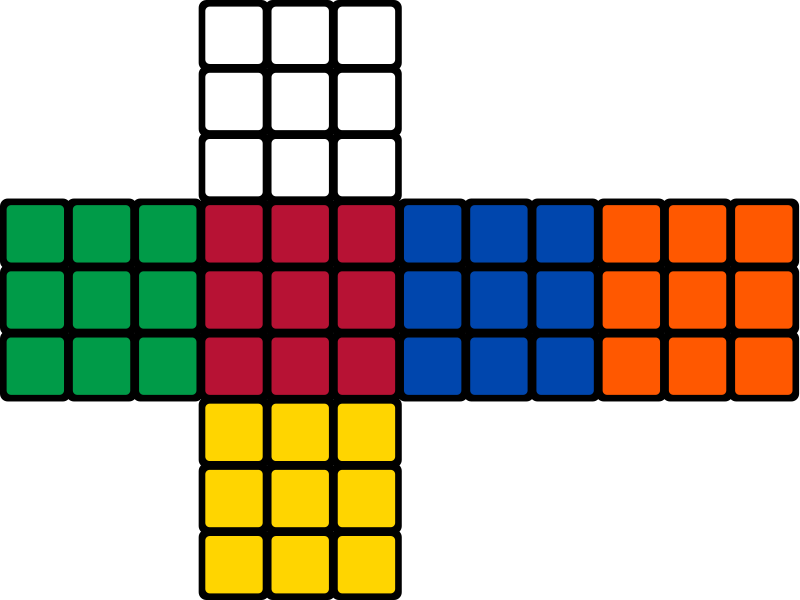

three directions, each with 4 planes

x-y RED ARROWS

y-z GREEN ARROWS

x-z BLUE ARROWS

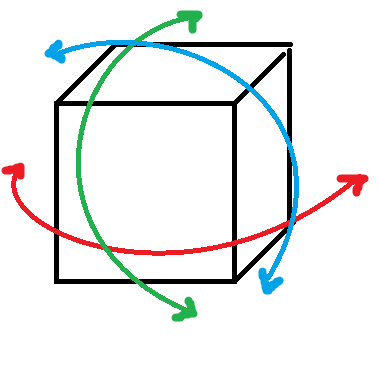

In [6]:
class Rubik():
  def __init__(self):
    self.linedim = 50 # how many px per row width or column height
    self.side_shape = np.array((3,3))*self.linedim
    self.side_h = np.zeros((self.side_shape), dtype=int)
    self.side_f = np.zeros((self.side_shape), dtype=int) + 1
    self.side_b = np.zeros((self.side_shape), dtype=int) + 2
    self.side_t = np.zeros((self.side_shape), dtype=int) + 3
    self.side_l = np.zeros((self.side_shape), dtype=int) + 4
    self.side_r = np.zeros((self.side_shape), dtype=int) + 5

    return

  def rotation_yz(self, direction, col=None):
    '''
    direction -> 1 or -1
    col -> 1,2 or 3
    '''

    affected_sides = np.array([self.side_h, self.side_t, self.side_f, self.side_b])
    rot_tensor = np.stack(affected_sides)

    from_col = (col-1)*self.linedim
    to_col = col*self.linedim

    rot_tensor[:, :, from_col:to_col] = np.roll(rot_tensor[:, :, from_col:to_col], direction, axis=0)
    
    self.side_h, self.side_t, self.side_f, self.side_b = rot_tensor


    return

  def rotation_xz(self, direction, row=None):
    '''
    direction -> 1 or -1
    row -> 1,2 or 3
    '''

    affected_sides = np.array([self.side_f, self.side_r, self.side_h, self.side_l])
    rot_tensor = np.stack(affected_sides)

    from_row = (row-1)*self.linedim
    to_row = row*self.linedim

    rot_tensor[:,from_row:to_row, :] = np.roll(rot_tensor[:,from_row:to_row, :], direction, axis=0)
    self.side_f, self.side_r, self.side_h, self.side_l = rot_tensor

    return

  def rotate_left(self, row=None):
    '''
    Rotate row of choice to the left (top row=1, middle=2, bottom=3)
    If no row is chosen, the entire cube is rotated, the right side becomes
    the front.
    '''
    if not row:
      for i in [1,2,3]:
        self.rotation_xz(direction=-1, row=i)
        self.side_t = np.rot90(self.side_t,-1)
        self.side_b = np.rot90(self.side_b,1)

    else:
      self.rotation_xz(direction=-1, row=row)
      if row==1:
        self.side_t = np.rot90(self.side_t,-1)
      elif row==3:
        self.side_b = np.rot90(self.side_b,1)

    return

  def rotate_right(self, row=None):
    '''
    Rotate row of choice to the right (top row=1, middle=2, bottom=3)
    If no row is chosen, the entire cube is rotated, the left side becomes
    the front.
    '''
    if not row:
      for i in [1,2,3]:
        self.rotation_xz(direction=1, row=i)
        self.side_t = np.rot90(self.side_t,1)
        self.side_b = np.rot90(self.side_b,-1)

        self.side_f = np.rot90(self.side_f,1)
        self.side_h = np.rot90(self.side_h,1)

        self.side_l = np.rot90(self.side_l,1)
        self.side_r = np.rot90(self.side_r,1)


    else:
      self.rotation_xz(direction=1, row=row)
      if row==1:
        self.side_t = np.rot90(self.side_t,1)
      elif row==3:
        self.side_b = np.rot90(self.side_b,-1)

    return

  def rotate_up(self, col=None):
    '''
    Rotate column of choice upwards (left column=1, middle=2, right=3)
    If no column is chosen, the entire cube is rotated, the down side becomes
    the front.
    '''

    if not col:
      for i in [1,2,3]:
        self.rotation_yz(direction=-1, col=i)
        self.side_l = np.rot90(self.side_l, 1)
        self.side_r = np.rot90(self.side_r, -1)

    else:
      self.rotation_yz(direction=-1, col=col)

      if col == 1:
        self.side_l = np.rot90(self.side_l, 1)
      elif col== 3:
        self.side_r = np.rot90(self.side_r, -1)

    return

  def rotate_down(self, col=None):
    '''
    Rotate column of choice downwards (left column=1, middle=2, right=3)
    If no column is chosen, the entire cube is rotated, the upper side becomes
    the front.
    '''

    if not col:
      for i in [1,2,3]:
        self.rotation_yz(direction=1, col=i)
        self.side_l = np.rot90(self.side_l, -1)
        self.side_r = np.rot90(self.side_r, 1)

    else:
      self.rotation_yz(direction=1, col=col)
      if col == 1:
        self.side_l = np.rot90(self.side_l, -1)
      elif col== 3:
        self.side_r = np.rot90(self.side_r, 1)

    return


  def visualize(self):
    # white -> 0
    # yellow -> 1
    # orange -> 2
    # red -> 3
    # green -> 4
    # blue -> 5
    
    empty = np.zeros_like(self.side_h) -1

    first_row = np.hstack((empty, self.side_h, empty, empty))
    second_row = np.hstack((self.side_l, self.side_t, self.side_r, self.side_b))
    third_row = np.hstack((empty, self.side_f, empty, empty))
    res = np.vstack((first_row, second_row, third_row))

    res = self.convert_to_colors(res)

    return res

  def convert_to_colors(self, num_array):
    # white  rgb(255,255,255)
    #	yellow rgb(255,255,0)
    # orange rgb(255,165,0)
    # red    rgb(255,0,0)
    # green  rgb(0,255,0)
    # blue   rgb(0,0,255)

    layer_1 = num_array.copy()
    layer_2 = num_array.copy()
    layer_3 = num_array.copy()

    white_mask = np.where(num_array==0)
    yellow_mask = np.where(num_array==1)
    orange_mask = np.where(num_array==2)
    red_mask = np.where(num_array==3)
    green_mask = np.where(num_array==4)
    blue_mask = np.where(num_array==5)
    black_mask = np.where(num_array==255)

    # white
    layer_1[white_mask] = layer_2[white_mask] = layer_3[white_mask] = 255

    # yellow
    layer_1[yellow_mask] = layer_2[yellow_mask] = 255
    layer_3[yellow_mask] = 0

    # orange
    layer_1[orange_mask] = 255
    layer_2[orange_mask] = 165
    layer_3[orange_mask] = 0

    # red
    layer_1[red_mask] = 255
    layer_2[red_mask] = layer_3[red_mask] = 0

    # green
    layer_1[green_mask] = layer_3[green_mask] = 0
    layer_2[green_mask] = 255

    # blue
    layer_1[blue_mask] = layer_2[blue_mask] = 0
    layer_3[blue_mask] = 255

    
    return np.stack((layer_3,layer_2,layer_1),axis=2)

  def randomize(self, steps: int=2):

    '''
    performs random rotations in all directions
    more steps = more rotations

    returns a dictionary with keys describing the rotation parameters
    and values produced by self.visualize()
    '''
    rnd_choices =(None, 1, 2, 3)
    rot_log = {}

    if steps > 10:
      steps = 10
    
    for i in range(steps):

      choice = np.random.choice(rnd_choices)
      self.rotate_left(choice)
      rot_log[str(i) + '_left: ' + str(choice)] = self.visualize()

      choice = np.random.choice(rnd_choices)
      self.rotate_right(choice)
      rot_log[str(i) + '_right: ' + str(choice)] = self.visualize()

      choice = np.random.choice(rnd_choices)
      self.rotate_up(choice)
      rot_log[str(i) + '_up: ' + str(choice)] = self.visualize()

      choice = np.random.choice(rnd_choices)
      self.rotate_down(choice)
      rot_log[str(i) + '_down: ' + str(choice)] = self.visualize()

    return rot_log



In [7]:
import cv2
from google.colab.patches import cv2_imshow

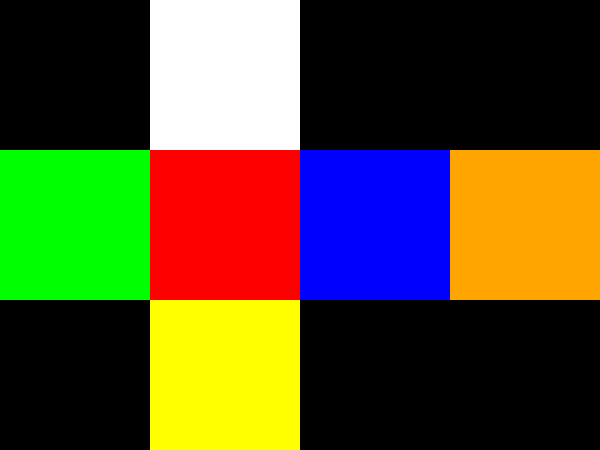

In [8]:
rbk=Rubik()
pic = rbk.visualize()
cv2_imshow(pic)

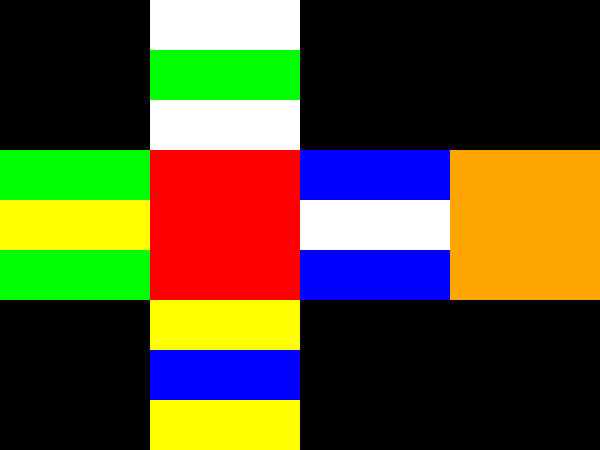

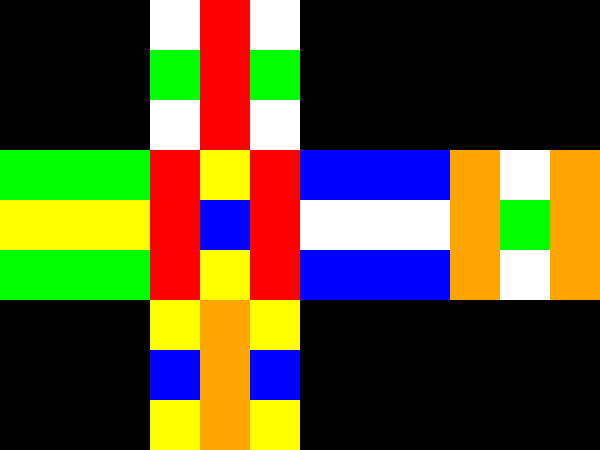

In [10]:
rbk = Rubik()
rbk.rotate_left(row=2)
cv2_imshow(rbk.visualize())
rbk.rotate_up(col=2)
cv2_imshow(rbk.visualize())

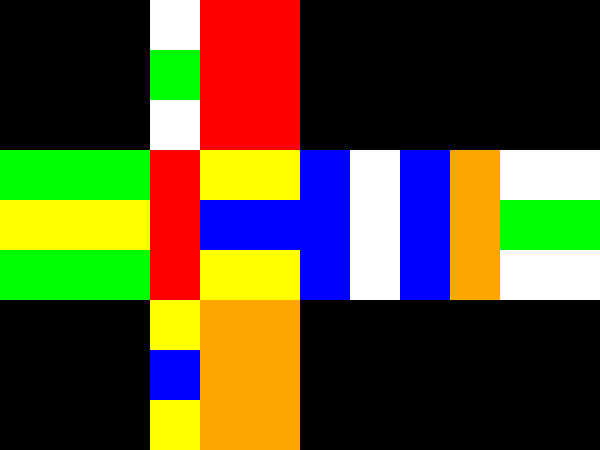

In [ ]:
rbk.rotate_up(3)
cv2_imshow(rbk.visualize())

0_left: 3


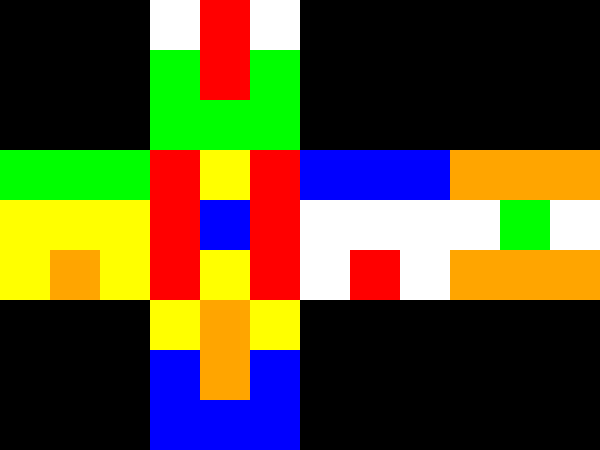

0_right: 2


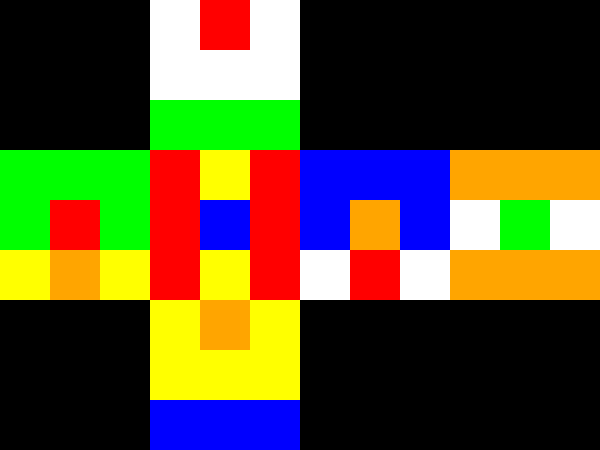

0_up: None


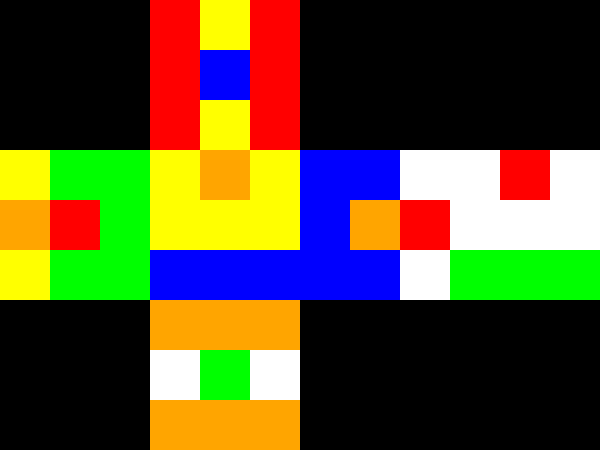

0_down: 2


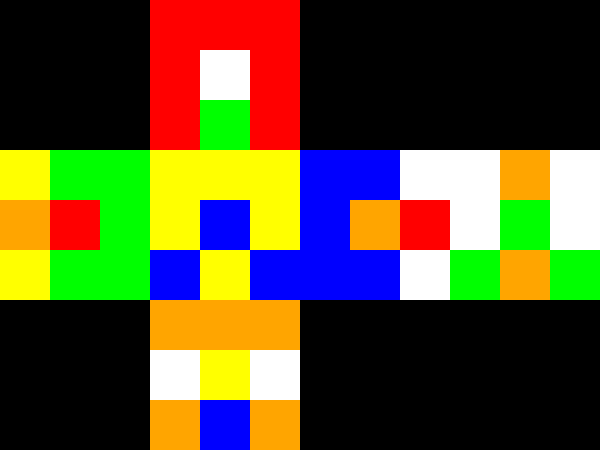

1_left: 3


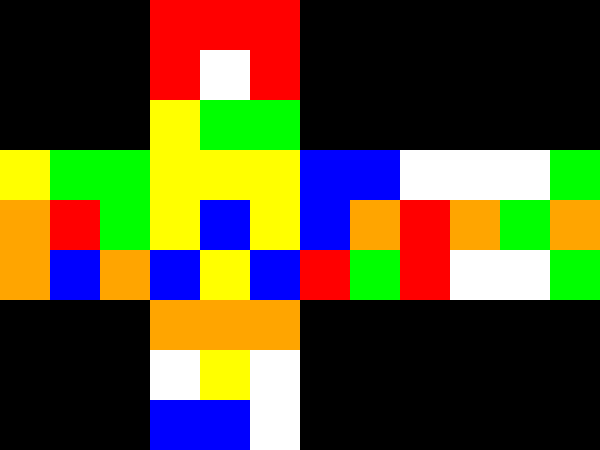

1_right: 1


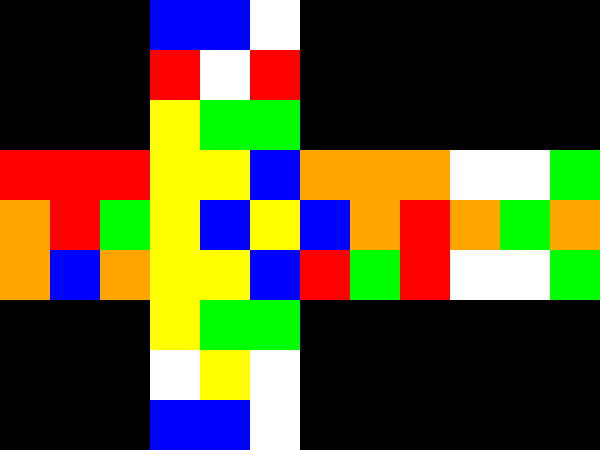

1_up: None


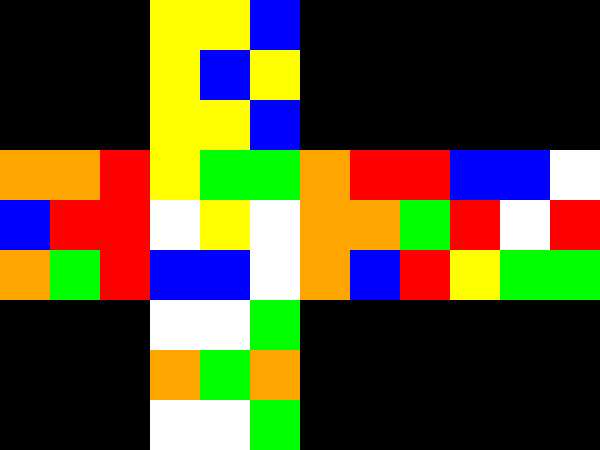

1_down: None


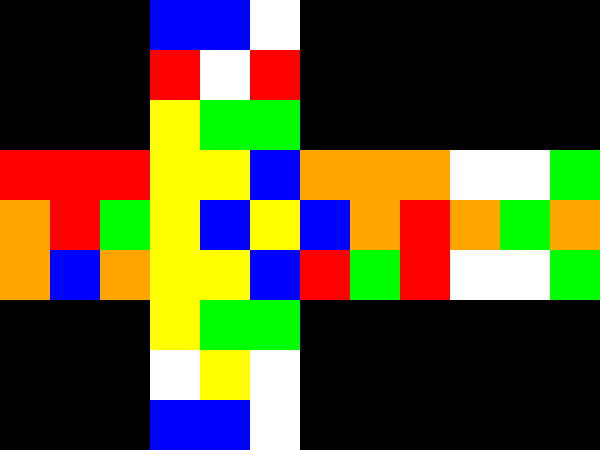

In [ ]:
rot_log = rbk.randomize()
for k,v in rot_log.items():
  print(k)
  cv2_imshow(v)

In [26]:
front = np.array([[1,2,3],[4,5,6],[7,8,9]])
back = front*-1

left = np.array([[1,1,1],[2,2,2],[3,3,3]])
right = left*-1


In [236]:
class NewRubik():
  def __init__(self):
    self.linedim = 50 # how many px per row width or column height
    self.side_shape = np.array((3,3))*self.linedim
    self.hind = np.zeros(self.side_shape)
    self.front = self.hind + 1
    self.bot = self.front + 1
    self.top = self.bot + 1
    self.left = self.top + 1
    self.right = self.left + 1

  def visualize(self):
    # white -> 0
    # yellow -> 1
    # orange -> 2
    # red -> 3
    # green -> 4
    # blue -> 5
  
    empty = np.zeros_like(self.hind) -1

    first_row = np.hstack((empty, self.hind, empty, empty))
    second_row = np.hstack((self.left, self.top, self.right, self.bot))
    third_row = np.hstack((empty, self.front, empty, empty))
    res = np.vstack((first_row, second_row, third_row))

    res = self.convert_to_colors(res)

    return res

  def convert_to_colors(self, num_array):
    # white  rgb(255,255,255)
    #	yellow rgb(255,255,0)
    # orange rgb(255,165,0)
    # red    rgb(255,0,0)
    # green  rgb(0,255,0)
    # blue   rgb(0,0,255)

    layer_1 = num_array.copy()
    layer_2 = num_array.copy()
    layer_3 = num_array.copy()

    white_mask = np.where(num_array==0)
    yellow_mask = np.where(num_array==1)
    orange_mask = np.where(num_array==2)
    red_mask = np.where(num_array==3)
    green_mask = np.where(num_array==4)
    blue_mask = np.where(num_array==5)
    black_mask = np.where(num_array==255)

    # white
    layer_1[white_mask] = layer_2[white_mask] = layer_3[white_mask] = 255

    # yellow
    layer_1[yellow_mask] = layer_2[yellow_mask] = 255
    layer_3[yellow_mask] = 0

    # orange
    layer_1[orange_mask] = 255
    layer_2[orange_mask] = 165
    layer_3[orange_mask] = 0

    # red
    layer_1[red_mask] = 255
    layer_2[red_mask] = layer_3[red_mask] = 0

    # green
    layer_1[green_mask] = layer_3[green_mask] = 0
    layer_2[green_mask] = 255

    # blue
    layer_1[blue_mask] = layer_2[blue_mask] = 0
    layer_3[blue_mask] = 255

    
    return np.stack((layer_3,layer_2,layer_1),axis=2)


  def rotate_X(self, row=None, direction=1):
    '''
    Chains all involved sides together and switches values between them
    based on the specified direction and rows
    '''

    self.prepare_for_X_rotation()

    chained_sides = np.array([self.front, self.right, self.hind, self.left])
    
    if row:
      from_row = self.linedim * (row-1)
      to_row = self.linedim * row
    
    else:
      from_row = 0
      to_row = None

    # this is where the magic happens
    chained_sides[:,from_row:to_row,:] = np.roll(chained_sides,direction,0)[:,from_row:to_row,:]
    
    self.front, self.right, self.hind, self.left = chained_sides
    self.revert_preparation_for_X_rotation()

    self.ministry_of_spatial_relations(axis='X', direction=direction, row=row)


  def rotate_Y(self, col=None, direction=1):
    '''
    Chains all involved sides together and switches values between them
    based on the specified direction and columns
    '''

    self.prepare_for_Y_rotation()

    chained_sides = np.array([self.front, self.top, self.hind, self.bot])
    
    if col:
      from_col = self.linedim * (col-1)
      to_col = self.linedim * col
    
    else:
      from_col = 0
      to_col = None

    # this is where the magic happens
    chained_sides[:,:,from_col:to_col] = np.roll(chained_sides,direction,0)[:,:,from_col:to_col]
    
    self.front, self.top, self.hind, self.bot = chained_sides
    self.revert_preparation_for_Y_rotation()

    self.ministry_of_spatial_relations(axis='Y', direction=direction, col=col)

  def ministry_of_spatial_relations(self, axis, direction, row=None, col=None):
    ''' 
    takes care of the relations between sides in the 3d form
    for example, when a top row is rotated on the FRONT side, it not only
    rotates the top row on RIGHT, HIND and LEFT side, but also rotates the
    entire TOP side itself
    '''

    if axis == 'X':
      if row == 1:
        # top row rotates the TOP side
        self.top = np.rot90(self.top, direction)

      elif row == 3:
        # bottom row rotates the BOT side
        self.bot = np.rot90(self.bot, -direction)

      elif not row:
        # both TOP and BOT sides rotate if all rows do
        self.top = np.rot90(self.top, direction)
        self.bot = np.rot90(self.bot, -direction)

    elif axis == 'Y':
      if col == 1:
        # left column rotates the LEFT side
        self.left = np.rot90(self.left, direction)

      elif col == 3:
        # right column rotates the RIGHT side
        self.right = np.rot90(self.right, -direction)

      elif not row:
        # bot LEFT and RIGHT sides rotate if all columns do
        self.left = np.rot90(self.left, direction)
        self.right = np.rot90(self.right, -direction)
    
    return

  def rotate_right(self, row=None):
    '''
    Wrapper for "rotate_X" function, with determined direction

    Row -> {1, 2, 3, None}
    1 being the topmost, 2 in the middle, 3 on the bottom

    If not specified, defaults to None and rotates all 3 rows
    
    '''
    self.rotate_X(row=row, direction=1)

  def rotate_left(self, row=None):
    '''
    Wrapper for "rotate_X" function, with determined direction

    Row -> {1, 2, 3, None}
    1 being the topmost, 2 in the middle, 3 on the bottom

    If not specified, defaults to None and rotates all 3 rows
    '''
    self.rotate_X(row=row, direction=-1)


  def rotate_up(self, col=None):
    '''
    Wrapper for "rotate_Y" function, with determined direction

    Col -> {1, 2, 3, None}
    1 being the leftmost, 2 in the middle, 3 on the right

    If not specified, defaults to None and rotates all 3 columns
    '''
    self.rotate_Y(col=col, direction=1)


  def rotate_down(self, col=None):
    '''
    Wrapper for "rotate_Y" function, with determined direction

    Col -> {1, 2, 3, None}
    1 being the leftmost, 2 in the middle, 3 on the right

    If not specified, defaults to None and rotates all 3 columns
    '''
    self.rotate_Y(col=col, direction=-1)

  def prepare_for_X_rotation(self):
    '''
    visualized arrays are rotated according to their position relative
    to the TOP side, so they're in need of "arranging"

    for example, when looking at the flattened cube, on the LEFT side 
    the topmost line is visualized as being the rightmost (that side
    is the one closest to the TOP side, and furthest from the BOT side)

    so a rotation of 90 degrees counter clockwise is needed to get
    the topmost line at the actual top of the numpy matrix.

    this is needed only for ease of working with matrices, and is reverted
    later on
    '''

    self.right = np.rot90(self.right,-1)
    self.left = np.rot90(self.left,1)
    self.hind = np.rot90(self.hind,-2)
  
  def revert_preparation_for_X_rotation(self):
    '''
    undo the "allignment" done by the "prepare_for_X_rotation" function
    
    '''
    self.right = np.rot90(self.right,1)
    self.left = np.rot90(self.left,-1)
    self.hind = np.rot90(self.hind,2)


  
  def prepare_for_Y_rotation(self):
    '''
    visualized arrays are rotated according to their position relative
    to the TOP side, so they're in need of "arranging"

    for example, when looking at the flattened cube, on the HIND side 
    the topmost line is visualized as being the downmost (that side
    is the one closest to the TOP side, and furthest from the BOT side)

    so a rotation of 180 degrees is needed to get
    the topmost line at the actual top of the numpy matrix.

    this is needed only for ease of working with matrices, and is reverted
    later on
    '''
    self.bot = np.rot90(self.bot, 2)


  def revert_preparation_for_Y_rotation(self):
    '''
    undo the "allignment" done by the "prepare_for_Y_rotation" function
    
    '''
    self.bot = np.rot90(self.bot, -2)


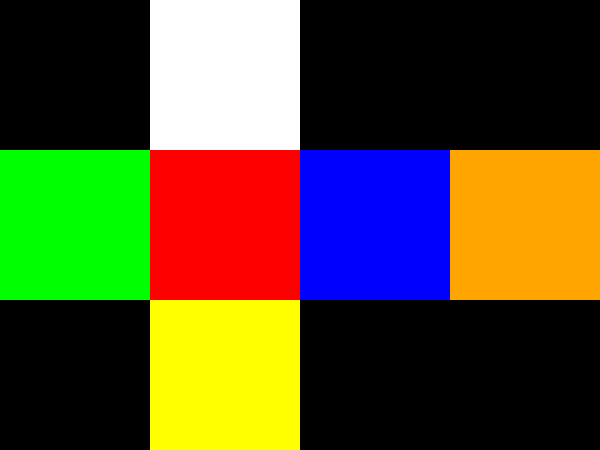

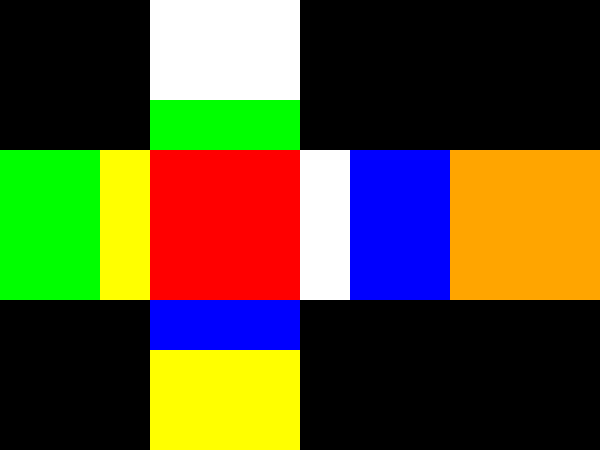

In [237]:
cube = NewRubik()
cv2_imshow(cube.visualize())

print()

cube.rotate_left(1)
cv2_imshow(cube.visualize())


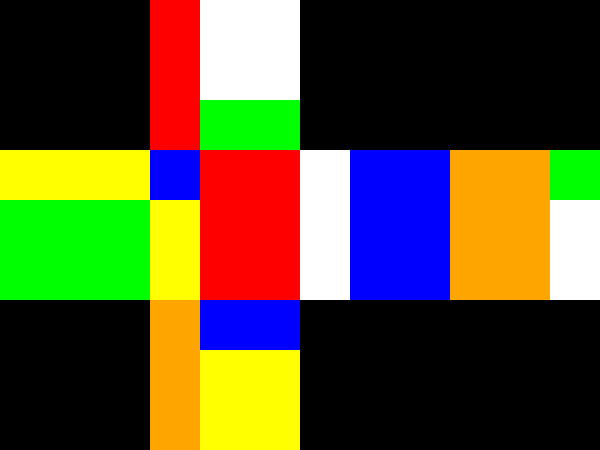

In [238]:
cube.rotate_up(1)
cv2_imshow(cube.visualize())